In [34]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import random
color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999
split = .2
num_classes = 9

In [35]:
train_df_red = pd.read_csv("./dataset/ordinal/Wine Quality/winequality-red.csv", sep=';')
train_df_white = pd.read_csv("./dataset/ordinal/Wine Quality/winequality-white.csv", sep=';')

In [36]:
train_df = train_df_white.copy().sample(frac=1, random_state=1)
columns = list(train_df.columns)
columns[-1] = 'label'
train_df.columns = columns
print('Number of features is ' + str(len(train_df.columns)-1))
print('Number of data points is ' + str(len(train_df)))
train_df.head()

Number of features is 11
Number of data points is 4898


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,label
2414,6.2,0.38,0.18,7.4,0.095,28.0,195.0,0.99773,3.53,0.71,9.2,4
1584,6.4,0.25,0.74,7.8,0.045,52.0,209.0,0.99560,3.21,0.42,9.2,6
3248,6.4,0.25,0.37,4.5,0.039,41.0,147.0,0.99210,3.18,0.40,11.1,7
645,6.3,0.26,0.25,7.8,0.058,44.0,166.0,0.99610,3.24,0.41,9.0,5
3163,7.1,0.36,0.37,4.8,0.019,39.0,114.0,0.99036,3.08,0.49,12.7,7


Number of classes is 7


(array([   20.,   163.,  1457.,  2198.,   880.,   175.,     5.]),
 array([0, 1, 2, 3, 4, 5, 6, 7]),
 <a list of 7 Patch objects>)

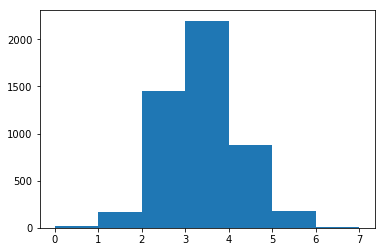

In [37]:
label=train_df.label.values
label = label - np.min(label)
num_classes = len(np.unique(label))
print('Number of classes is ' + str(num_classes))
plt.hist(label, bins=range(num_classes+1))


# Training - Validation Split

In [38]:
feat_df=train_df.drop('label', axis=1)
feat_df = (feat_df - feat_df.mean()) / (feat_df.max() - feat_df.min())
feat_df.head()

fvec = feat_df.values
print(fvec)

[[-0.06296035  0.09976361 -0.09288645 ...,  0.31066669  0.255992
  -0.21197856]
 [-0.04372958 -0.02768737  0.24446295 ...,  0.0197576  -0.0812173
  -0.21197856]
 [-0.04372958 -0.02768737  0.02157138 ..., -0.00751513 -0.10447311
   0.09447306]
 ..., 
 [ 0.14857811 -0.0865109   0.05169186 ..., -0.11660604  0.18622456
   0.09447306]
 [-0.07257574 -0.05709914 -0.05071778 ...,  0.0197576  -0.10447311
   0.02995693]
 [ 0.03319349 -0.04729521  0.02759548 ..., -0.08933331 -0.05796148
  -0.24423662]]


[0 1 2 3 4 5 6]


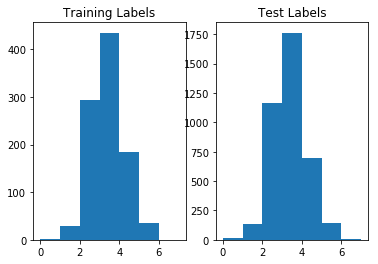

In [39]:
split_idx = int(len(label)*split)
fvec_tr = fvec[:split_idx,:]
fvec_test = fvec[split_idx:,:]
label_tr = label[:split_idx]
label_test = label[split_idx:]

plt.subplot(121)
plt.hist(label_tr, bins=range(num_classes+1))
plt.title('Training Labels')
plt.subplot(122)
plt.hist(label_test, bins=range(num_classes+1))
plt.title('Test Labels')

print(np.unique(label))

## Ridge Regression

Coefficients: 
 [-0.10041959 -1.91218727  0.03923862  2.96763431 -0.20421887  1.01761809
 -0.23609151 -3.04031527  0.41044475  0.42721328  1.83874572]
Training
Mean absolute error: 0.64
Accuracy: 0.52
Validation
Mean absolute error: 0.69
Accuracy: 0.52


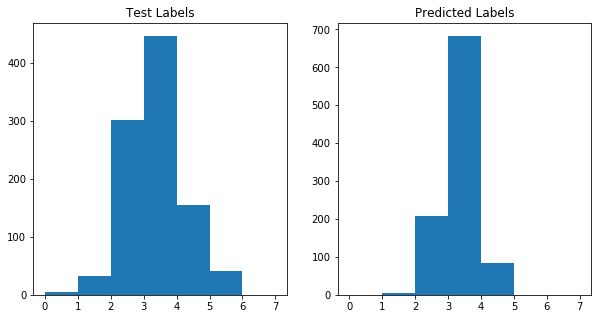

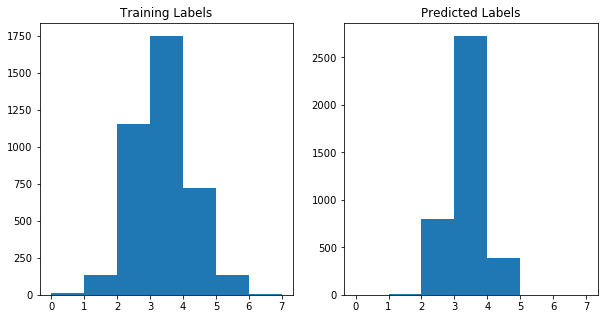

In [16]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error

# Create linear regression object
regr = linear_model.Ridge(alpha = .5)

# Train the model using training sets
regr.fit(fvec_tr, label_tr)

# Make predictions using the testing set
label_pred = np.round(regr.predict(fvec_test)).astype(np.int)
label_pred[label_pred<0]=0
label_pred[label_pred>=num_classes]=num_classes-1

label_tr_pred = np.round(regr.predict(fvec_tr)).astype(np.int)
label_tr_pred[label_tr_pred<0]=0
label_tr_pred[label_tr_pred>=num_classes]=num_classes-1

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print('Training')
print("Mean squared error: %.2f"
      % mean_squared_error(label_tr_pred, label_tr))

#CCR 
print("Accuracy: %.2f"
      % np.mean(label_tr_pred==label_tr))

# The mean squared error
print('Validation')
print("Mean squared error: %.2f"
      % mean_squared_error(label_pred, label_test))

#CCR 
print("Accuracy: %.2f"
      % np.mean(label_pred==label_test))

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.hist(label_test, bins=range(num_classes+1))
plt.title('Test Labels')
plt.subplot(122)
plt.hist(label_pred, bins=range(num_classes+1))
plt.title('Predicted Labels')

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.hist(label_tr, bins=range(num_classes+1))
plt.title('Training Labels')
plt.subplot(122)
plt.hist(label_tr_pred, bins=range(num_classes+1))
plt.title('Predicted Labels')

Training
Mean squared error: 0.71
Accuracy: 0.51
Validation
Mean squared error: 0.75
Accuracy: 0.52


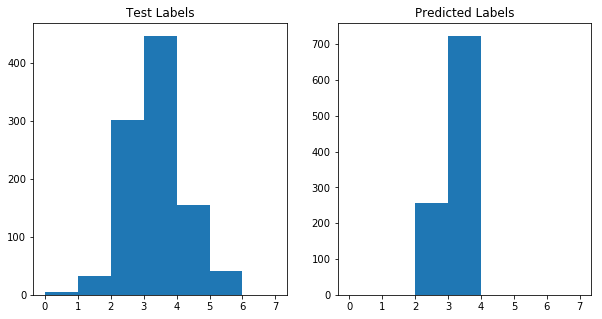

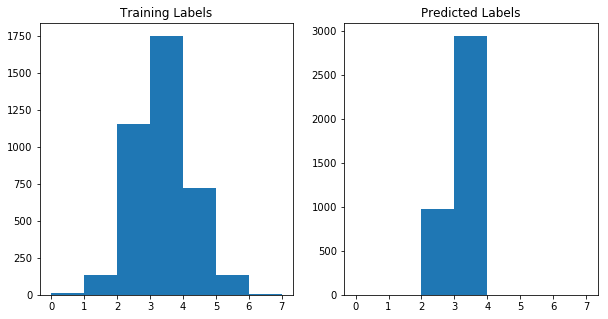

In [17]:

from sklearn.svm import SVC
clf = SVC()#class_weight = 'balanced')

clf.fit(fvec_tr, label_tr)
label_pred = clf.predict(fvec_test)
label_tr_pred = clf.predict(fvec_tr)

# The mean squared error
print('Training')
print("Mean squared error: %.2f"
      % mean_squared_error(label_tr_pred, label_tr))

#CCR 
print("Accuracy: %.2f"
      % np.mean(label_tr_pred==label_tr))

# The mean squared error
print('Validation')
print("Mean squared error: %.2f"
      % mean_squared_error(label_pred, label_test))

#CCR 
print("Accuracy: %.2f"
      % np.mean(label_pred==label_test))


plt.figure(figsize=(10,5))
plt.subplot(121)
plt.hist(label_test, bins=range(num_classes+1))
plt.title('Test Labels')
plt.subplot(122)
plt.hist(label_pred, bins=range(num_classes+1))
plt.title('Predicted Labels')

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.hist(label_tr, bins=range(num_classes+1))
plt.title('Training Labels')
plt.subplot(122)
plt.hist(label_tr_pred, bins=range(num_classes+1))
plt.title('Predicted Labels')

# MLP Network using PyTorch

In [40]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import torchsample
from torchsample import transforms as ts_transforms
import functions.fine_tune as ft
from tensorboardX import SummaryWriter

## Variables

In [41]:
data_type = 'wine_white'
num_samples = len(label)
num_classes = len(np.unique(label))
dim = fvec.shape[1]

optimizer='sgd' #Optimizer function
iter_loc=7 #Number of the first column in the excel file for writing the results.
lr=.5 #Initial learning rate
momentum=0.9
weight_decay=0.0005
batch_size = 64
lr_scheduler=ft.exp_lr_scheduler #Learning rate scheduler
lr_decay_epoch=10 #Number of epoch for learning rate decay
hidden_sizes = [4]
dropouts = [1]
rand_label = False

'''Multipliers for loss functions'''
single_loss=1.
multi_loss=0.

comment=' ' #Additional comments if any

## Numpy to Pytorch

In [42]:
dsets={'train': torch.utils.data.TensorDataset(torch.from_numpy(fvec_tr).type(torch.FloatTensor),
                                               torch.from_numpy(label_tr).type(torch.LongTensor)),
       'val': torch.utils.data.TensorDataset(torch.from_numpy(fvec_test).type(torch.FloatTensor),
                                             torch.from_numpy(label_test).type(torch.LongTensor))}

'''Define dataset loaders'''
dset_loaders = {'train':torch.utils.data.DataLoader(dsets['train'], batch_size=batch_size,shuffle=True,
                                                    num_workers=12),
                'val':torch.utils.data.DataLoader(dsets['val'], batch_size=batch_size,shuffle=False,
                                                    num_workers=12)}


dset_sizes={'train':len(dsets['train']),'val':len(dsets['val'])}
use_gpu = torch.cuda.is_available()

print(dset_sizes)

if use_gpu:
    print('GPU is available')
else:
    print('!!!!! NO CUDA GPUS DETECTED')

inputs, classes = next(iter(dset_loaders['train']))
print(inputs.shape)


{'train': 979, 'val': 3919}
GPU is available
torch.Size([64, 11])


## Log Keeping

In [43]:
import openpyxl
import time
from datetime import datetime

def writeLog(logname):
    '''
    Creates a text file named Network_properties.txt inside runs/'logname'
    '''
    f=open('runs_ordinal/'+logname+'/Network_properties.txt','w')
    f.write('Feature Length: '+str(dim)+'\n')
    f.write('Number of classes: '+str(num_classes)+'\n')
    f.write('Data type: '+data_type+'\n')
    
    f.write('Hidden sizes: '+ str(hidden_sizes)+'\n')
    f.write('Dropouts: '+str(dropouts)+'\n')
    f.write('Batch size: '+str(batch_size)+'\n')
    f.write('Number of samples: '+str(num_samples)+'\n')
    
    f.write('Optimizer: ' + optimizer + '\n')
    crt=str(single_loss)+'xsingle + '+str(multi_loss)+'Xmulti'
    f.write('Criterion: '+crt+'\n')
    f.write('Learning rate: '+str(lr)+'\n')
    f.write('Momentum: '+str(momentum)+'\n')
    f.write('Leraning Rate Scheduler: '+str(lr_scheduler)+'\n')
    f.write('Leraning Rate Decay Period: '+str(lr_decay_epoch)+'\n')
    f.close()


def writeLog_xlsx(logname='logs_ordinal.xlsx',iter_loc=8):
    '''
    Adds a line to logs.xlsx with the network properties and outcomes.
    :param iter_loc: First column to record the outcomes.
    '''
    book = openpyxl.load_workbook(logname)
    sheet = book.active
    crt=str(single_loss)+'xsingle + '+str(multi_loss)+'Xmulti'
    specs=(datetime.now().strftime('%B%d  %H:%M:%S'), str(data_type), str(hidden_sizes),str(dim),str(num_classes),
           crt, str(lr))
    sheet.append(specs)
    current_row = sheet.max_row
    sheet.cell(row=current_row, column=iter_loc+5).value = comment
    book.save(logname)
    
    
def write_epochs(result_log, logname):
    print(len(result_log))

    wb_tr = openpyxl.Workbook()
    ws_tr = wb_tr.active
    wb_val = openpyxl.Workbook()
    ws_val = wb_val.active
    print(logname)

    label_arr_tr = np.zeros((100000,1))
    probs_arr_tr = np.zeros((100000, num_classes))
    label_arr_val = np.zeros((100000,1))
    probs_arr_val = np.zeros((100000, num_classes))

    prev_epoch = 0
    
    count_tr = count_val = 0
    for result in result_log:
        epoch = result[1]
        if not epoch == prev_epoch:
            label_arr_tr = label_arr_tr[:count_tr]
            probs_arr_tr = probs_arr_tr[:count_tr, :]
            label_arr_val = label_arr_val[:count_val]
            probs_arr_val = probs_arr_val[:count_val, :]
            ws_tr.append(['Epoch ' + str(prev_epoch)])
            ws_tr.append(label_arr_tr[1:].reshape(-1).tolist())
            ws_tr.append(np.argmax(probs_arr_tr[1:,:], axis=1).reshape(-1).tolist())
            for probs in probs_arr_tr[1:,:].T.tolist():
                ws_tr.append(probs)
            #wb_tr.save('./runs_ordinal/'+logname + '/train.xlsx')
            ws_val.append(['Epoch ' + str(prev_epoch)])
            ws_val.append(label_arr_val[1:].reshape(-1).tolist())
            ws_val.append(np.argmax(probs_arr_val[1:,:], axis=1).reshape(-1).tolist())
            for probs in probs_arr_val[1:,:].T.tolist():
                ws_val.append(probs)
    

            label_arr_tr = np.zeros((100000,1))
            probs_arr_tr = np.zeros((100000, num_classes))
            label_arr_val = np.zeros((100000,1))
            probs_arr_val = np.zeros((100000, num_classes)) 
            count_tr = count_val = 0
            prev_epoch = epoch

        label = np.asarray(result[2]).reshape(-1,1)
        scores = np.asarray(result[3])
        exp_scores = np.exp(scores - np.max(scores,axis=1).reshape(-1, 1)*np.ones(num_classes))
        probs = np.round(exp_scores/(np.sum(exp_scores,axis=1).reshape(-1, 1)*np.ones(num_classes)), decimals=2)
        if result[0] == 'train':
            label_arr_tr[count_tr:count_tr + len(label)]  = label
            probs_arr_tr[count_tr:count_tr + len(label), :] = probs
            count_tr += len(label)
        elif result[0] == 'val':
            label_arr_val[count_val:count_val + len(label)]  = label
            probs_arr_val[count_val:count_val + len(label), :] = probs
            count_val += len(label)


    
    label_arr_tr = label_arr_tr[:count_tr]
    probs_arr_tr = probs_arr_tr[:count_tr, :]
    label_arr_val = label_arr_val[:count_val]
    probs_arr_val = probs_arr_val[:count_val, :]
            
    ws_tr.append(['Epoch ' + str(epoch)])
    ws_tr.append(label_arr_tr[1:].reshape(-1).tolist())
    ws_tr.append(np.argmax(probs_arr_tr[1:,:], axis=1).reshape(-1).tolist())
    for probs in probs_arr_tr[1:,:].T.tolist():
        ws_tr.append(probs)
    #wb_tr.save('./runs_ord/'+logname + '/train.xlsx')
    ws_val.append(['Epoch ' + str(epoch)])
    ws_val.append(label_arr_val[1:].reshape(-1).tolist())
    ws_val.append(np.argmax(probs_arr_val[1:,:], axis=1).reshape(-1).tolist())
    for probs in probs_arr_val[1:,:].T.tolist():
        ws_val.append(probs)
    wb_val.save('./runs_ordinal/'+logname + '/val.xlsx')
    label_arr_tr = np.zeros((1,1))
    probs_arr_tr = np.zeros((1, num_classes))
    label_arr_val = np.zeros((1,1))
    probs_arr_val = np.zeros((1, num_classes))
    prev_epoch = epoch
    print('Finito')
    
    del label_arr_tr, probs_arr_tr, label_arr_val, probs_arr_val



## MLP function

In [44]:
class Net(nn.Module):
    def __init__(self, input_size, hidden_sizes, dropouts, num_classes):
        super(Net, self).__init__()
        self.numHidden=len(hidden_sizes)
        setattr(self, 'fc0', nn.Linear(input_size, hidden_sizes[0]))
        setattr(self, 'relu0', nn.ReLU())
        #setattr(self, 'drop0', nn.Dropout(p=dropouts[0]))
        for k in range(len(hidden_sizes)-1):
            setattr(self, 'fc'+str(k+1), nn.Linear(hidden_sizes[k], hidden_sizes[k+1]))
            setattr(self, 'relu'+str(k+1), nn.ReLU())
            #setattr(self, 'drop'+str(k+1), nn.Dropout(p=dropouts[k+1]))
        setattr(self, 'fc'+str(len(hidden_sizes)), nn.Linear(hidden_sizes[-1], num_classes))
    
    def forward(self, x):
        out=self.fc0(x)
        out = self.relu0(out)
        #out = self.drop0(out)
        for k in range(self.numHidden-1):
            fc = getattr(self,'fc'+str(k+1))
            relu = getattr(self,'relu'+str(k+1))
            #drop = getattr(self,'drop'+str(k+1))
            out = fc(out)
            out = relu(out)
            #out = drop(out)
        fc = getattr(self,'fc'+str(self.numHidden))
        out = fc(out)
        return out
    
model=Net(2, [4, 2],[1, 1], 2)
print(model)

Net (
  (fc0): Linear (2 -> 4)
  (relu0): ReLU ()
  (fc1): Linear (4 -> 2)
  (relu1): ReLU ()
  (fc2): Linear (2 -> 2)
)


## Running the Network

In [45]:
import importlib
importlib.reload(ft)
def network_loader(comment=comment,
                    optimizer=optimizer,
                    iter_loc=iter_loc,
                    lr=lr,
                    momentum=momentum,
                    weight_decay=weight_decay,
                    lr_scheduler=lr_scheduler,
                    lr_decay_epoch=lr_decay_epoch,
                    nclasses=num_classes,
                    hidden_sizes = hidden_sizes,
                    dropouts = dropouts):
    
    '''Load the network from pytorch'''
    
    model_ft = Net(dim, hidden_sizes , dropouts, num_classes)

    if use_gpu:
        model_ft = model_ft.cuda()

    '''Define the optimizer function'''
    if(optimizer=='adam'):
        optimizer_ft = optim.Adam(model_ft.parameters(),lr=lr,weight_decay=weight_decay)
    elif(optimizer=='sgd'):
        optimizer_ft = optim.SGD(model_ft.parameters(), lr=lr, momentum=momentum, weight_decay=weight_decay)
    return model_ft, optimizer_ft

    
def run_network():
    '''
    Cretaes the log files and starts the training
    '''
    model_ft, optimizer_ft = network_loader(comment=comment, #'Tested for three rooms'
                                            optimizer=optimizer,
                                            iter_loc=iter_loc,
                                            lr=lr,
                                            momentum=momentum,
                                            weight_decay=weight_decay,
                                            lr_scheduler=lr_scheduler,
                                            lr_decay_epoch=lr_decay_epoch,
                                            nclasses=num_classes)
    
    
    '''Name of the trial'''
    crt=str(single_loss)+'xsingle + '+str(multi_loss)+'Xmulti'
    logname='Ordinal_'+datetime.now().strftime('%B%d  %H:%M:%S')
    writer = SummaryWriter('runs_ordinal/'+logname) #For tensorboard
    writeLog(logname)
    writeLog_xlsx()
    
    '''Start trianing'''
    best_model, last_model, result_log = ft.train_model(model_ft,optimizer_ft, lr_scheduler,dset_loaders,
                            dset_sizes,writer,use_gpu=use_gpu,num_epochs=30,batch_size=batch_size,num_log=250,
                            multi_prob=False,lr_decay_epoch=lr_decay_epoch,init_lr=lr,mse_loss=False,
                            iter_loc=iter_loc,cross_loss=single_loss,multi_loss=multi_loss,numOut=num_classes,
                                                       logname='logs_ordinal.xlsx')
    
    '''Save the models'''
    torch.save(best_model,'./saved_models/ordinal/'+logname+'_best')
    torch.save(last_model,'./saved_models/ordinal/'+logname+'_last')
    
    print('Writing results')
    write_epochs(result_log, logname)
    print('Wrote results')
    '''Free up the memory'''
    del model_ft, result_log




## Trials

In [47]:
optimizer='adam' #Optimizer function
lr=.005 #Initial learning rate
momentum=0.9
weight_decay=0.0005
lr_scheduler=ft.exp_lr_scheduler #Learning rate scheduler
lr_decay_epoch=10 #Number of epoch for learning rate decay
hidden_sizes = [8, 8, 8]
dropouts = []
single_loss=1.0
multi_loss =0.0
run_network()

Epoch 0/29
----------
LR is set to 0.005
train Loss: 0.0333 Acc: 0.0082 CIR-1: 0.0592 RMSE 2.9771
val Loss: 0.0309 Acc: 0.0965 CIR-1: 0.3782 RMSE 2.3084

Epoch 1/29
----------
train Loss: 0.0308 Acc: 0.1736 CIR-1: 0.6210 RMSE 1.6164
val Loss: 0.0286 Acc: 0.2210 CIR-1: 0.7119 RMSE 1.3550

Epoch 2/29
----------
train Loss: 0.0284 Acc: 0.2911 CIR-1: 0.7661 RMSE 1.2607
val Loss: 0.0264 Acc: 0.3042 CIR-1: 0.7905 RMSE 1.2282

Epoch 3/29
----------
train Loss: 0.0261 Acc: 0.2983 CIR-1: 0.7702 RMSE 1.2591
val Loss: 0.0243 Acc: 0.2975 CIR-1: 0.7816 RMSE 1.2451

Epoch 4/29
----------
train Loss: 0.0241 Acc: 0.3442 CIR-1: 0.8121 RMSE 1.1673
val Loss: 0.0224 Acc: 0.4907 CIR-1: 0.9365 RMSE 0.8502

Epoch 5/29
----------
train Loss: 0.0224 Acc: 0.4545 CIR-1: 0.9336 RMSE 0.8688
val Loss: 0.0210 Acc: 0.4499 CIR-1: 0.9245 RMSE 0.8978

Epoch 6/29
----------
train Loss: 0.0211 Acc: 0.4443 CIR-1: 0.9316 RMSE 0.8782
val Loss: 0.0202 Acc: 0.4499 CIR-1: 0.9245 RMSE 0.8978

Epoch 7/29
----------
train Loss: 0.

/home/mtezcan/anaconda3/lib/python3.6/site-packages/torch/serialization.py:147: UserWarning: Couldn't retrieve source code for container of type Net. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


KeyboardInterrupt: 

In [32]:
import os
print(os.listdir('./'))

['CNN_trials.ipynb', 'dataset', 'runs_ord', 'logs_ord.xlsx', 'runs', 'Syntehtic Data.ipynb', 'Dataset Expolaration (ordinal).ipynb', 'logs.xlsx', 'model.pkl', 'backup.zip', 'Untitled.ipynb', 'functions', 'Dataset Expolaration.ipynb', 'runs_ordinal', '.ipynb_checkpoints', '.gitignore', '.git', 'saved_models', 'README.md']
